<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Statistics (c)

## Machine Learning

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt
# import warnings; warnings.simplefilter('ignore')

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
np.random.seed(1000)
np.set_printoptions(suppress=True, precision=4)
%config InlineBackend.figure_format = 'svg'

## Unsupervised Learning

### The Data

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(n_samples=250, centers=4,
                  random_state=500, cluster_std=1.25)  

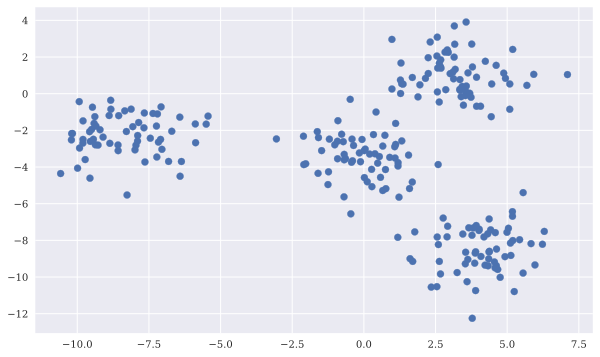

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=50);
# plt.savefig('../../images/ch13/ml_plot_01.png')

### K-Means Clustering

In [6]:
from sklearn.cluster import KMeans  

In [7]:
model = KMeans(n_clusters=4, random_state=0)  

In [8]:
model.fit(X)  

KMeans(n_clusters=4, random_state=0)

In [9]:
y_kmeans = model.predict(X)  

In [10]:
y_kmeans[:12]  

array([1, 1, 0, 3, 0, 1, 3, 3, 3, 0, 2, 2], dtype=int32)

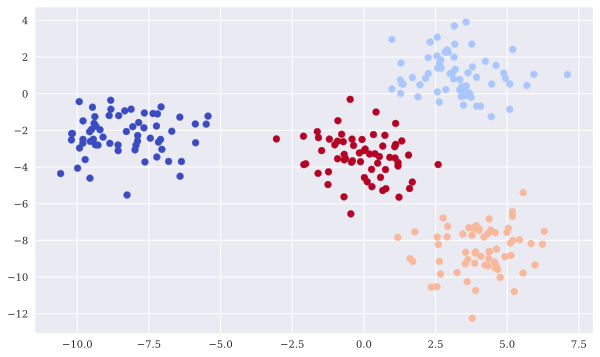

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans,  cmap='coolwarm');
# plt.savefig('../../images/ch13/ml_plot_02.png');

### Gaussian Mixtures

In [12]:
from sklearn.mixture import GaussianMixture

In [13]:
model = GaussianMixture(n_components=4, random_state=0)

In [14]:
model.fit(X)

GaussianMixture(n_components=4, random_state=0)

In [15]:
y_gm = model.predict(X)

In [16]:
y_gm[:12]

array([1, 1, 0, 3, 0, 1, 3, 3, 3, 0, 2, 2])

In [17]:
(y_gm == y_kmeans).all()  

True

## Supervised Learning

### The Data

In [18]:
from sklearn.datasets import make_classification

In [19]:
n_samples = 100

In [20]:
X, y = make_classification(n_samples=n_samples, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, random_state=250)

In [21]:
X[:5]  

array([[ 1.6876, -0.7976],
       [-0.4312, -0.7606],
       [-1.4393, -1.2363],
       [ 1.118 , -1.8682],
       [ 0.0502,  0.659 ]])

In [22]:
X.shape  

(100, 2)

In [23]:
y[:5]  

array([1, 0, 0, 1, 1])

In [24]:
y.shape  

(100,)

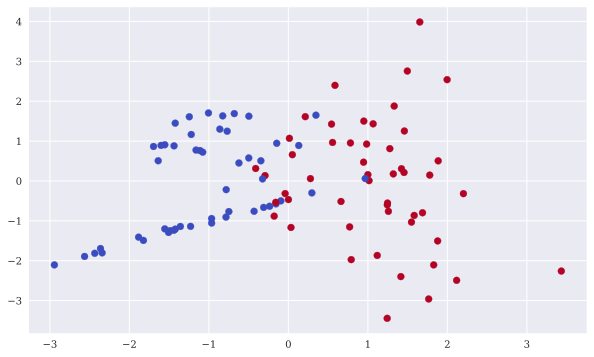

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap='coolwarm');
# plt.savefig('../../images/ch13/ml_plot_03.png')

### Gaussian Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [27]:
model = GaussianNB()

In [28]:
model.fit(X, y)

GaussianNB()

In [29]:
model.predict_proba(X).round(4)[:5]  

array([[0.0041, 0.9959],
       [0.8534, 0.1466],
       [0.9947, 0.0053],
       [0.0182, 0.9818],
       [0.5156, 0.4844]])

In [30]:
pred = model.predict(X)  

In [31]:
pred  

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [32]:
pred == y  

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True])

In [33]:
accuracy_score(y, pred)  

0.87

In [34]:
Xc = X[y == pred]  
Xf = X[y != pred]  

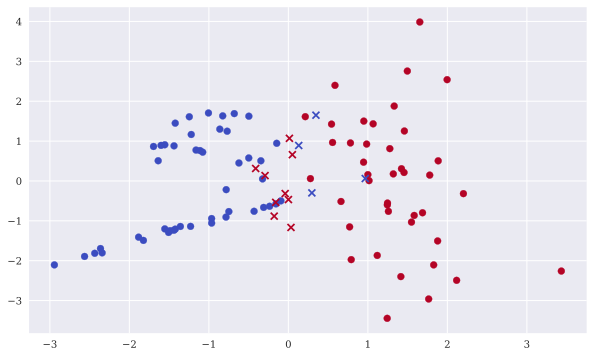

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(x=Xc[:, 0], y=Xc[:, 1], c=y[y == pred],
            marker='o', cmap='coolwarm')  
plt.scatter(x=Xf[:, 0], y=Xf[:, 1], c=y[y != pred],
            marker='x', cmap='coolwarm');  
# plt.savefig('../../images/ch13/ml_plot_04.png')

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model = LogisticRegression(C=1)

In [38]:
model.fit(X, y)

LogisticRegression(C=1)

In [39]:
model.predict_proba(X).round(4)[:5]

array([[0.011 , 0.989 ],
       [0.7266, 0.2734],
       [0.971 , 0.029 ],
       [0.04  , 0.96  ],
       [0.4843, 0.5157]])

In [40]:
pred = model.predict(X)

In [41]:
accuracy_score(y, pred)

0.9

In [42]:
Xc = X[y == pred]
Xf = X[y != pred]

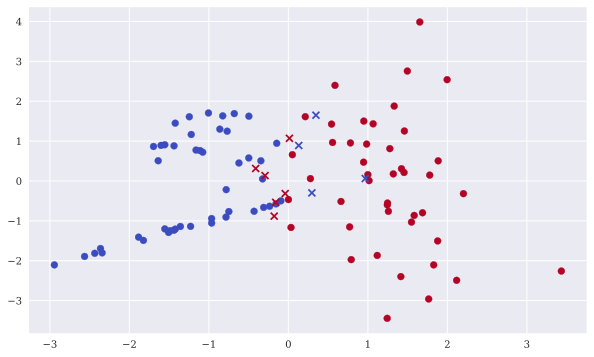

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(x=Xc[:, 0], y=Xc[:, 1], c=y[y == pred],
            marker='o', cmap='coolwarm')
plt.scatter(x=Xf[:, 0], y=Xf[:, 1], c=y[y != pred],
            marker='x', cmap='coolwarm');

### Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
model = DecisionTreeClassifier(max_depth=1)

In [46]:
model.fit(X, y)

DecisionTreeClassifier(max_depth=1)

In [47]:
model.predict_proba(X).round(4)[:5]

array([[0.08, 0.92],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.08, 0.92],
       [0.08, 0.92]])

In [48]:
pred = model.predict(X)

In [49]:
accuracy_score(y, pred)

0.92

In [50]:
Xc = X[y == pred]
Xf = X[y != pred]

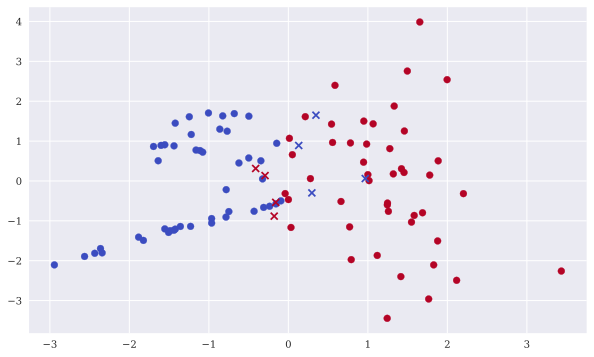

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(x=Xc[:, 0], y=Xc[:, 1], c=y[y == pred],
            marker='o', cmap='coolwarm')
plt.scatter(x=Xf[:, 0], y=Xf[:, 1], c=y[y != pred],
            marker='x', cmap='coolwarm');
# plt.savefig('../../images/ch13/ml_plot_05.png')

In [52]:
print('{:>8s} | {:8s}'.format('depth', 'accuracy'))
print(20 * '-')
for depth in range(1, 7):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X, y)
    acc = accuracy_score(y, model.predict(X))
    print('{:8d} | {:8.2f}'.format(depth, acc))

   depth | accuracy
--------------------
       1 |     0.92
       2 |     0.92
       3 |     0.94
       4 |     0.97
       5 |     0.99
       6 |     1.00


### Deep Neural Network

#### scikit-learn

In [53]:
from sklearn.neural_network import MLPClassifier

In [54]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=500,
                    hidden_layer_sizes=2 * [75], random_state=10)

In [55]:
%time model.fit(X, y)

CPU times: user 1.3 s, sys: 566 ms, total: 1.87 s
Wall time: 282 ms


MLPClassifier(alpha=1e-05, hidden_layer_sizes=[75, 75], max_iter=500,
              random_state=10, solver='lbfgs')

In [56]:
pred = model.predict(X)
pred

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [57]:
accuracy_score(y, pred)

1.0

#### Keras (instead of TensorFlow 1.x example)

In [58]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [59]:
tf.random.set_seed(1)
np.random.seed(1)

In [60]:
features = 2

In [61]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=features))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

In [62]:
X[:5]

array([[ 1.6876, -0.7976],
       [-0.4312, -0.7606],
       [-1.4393, -1.2363],
       [ 1.118 , -1.8682],
       [ 0.0502,  0.659 ]])

In [63]:
model.fit(X, y, epochs=50, verbose=False)

In [64]:
model.evaluate(X, y)

4/4 [==============================] - 0s 922us/step - loss: 0.2449 - accuracy: 0.9100


[0.24486945569515228, 0.9100000262260437]

In [65]:
pred = np.where(model.predict(X) > 0.5, 1, 0)

In [66]:
pred.flatten()

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

## Feature Transforms

In [67]:
from sklearn import preprocessing

In [68]:
X[:5]

array([[ 1.6876, -0.7976],
       [-0.4312, -0.7606],
       [-1.4393, -1.2363],
       [ 1.118 , -1.8682],
       [ 0.0502,  0.659 ]])

In [69]:
Xs = preprocessing.StandardScaler().fit_transform(X)  
Xs[:5]

array([[ 1.2881, -0.5489],
       [-0.3384, -0.5216],
       [-1.1122, -0.873 ],
       [ 0.8509, -1.3399],
       [ 0.0312,  0.5273]])

In [70]:
Xm = preprocessing.MinMaxScaler().fit_transform(X)  
Xm[:5]

array([[0.7262, 0.3563],
       [0.3939, 0.3613],
       [0.2358, 0.2973],
       [0.6369, 0.2122],
       [0.4694, 0.5523]])

In [71]:
Xn1 = preprocessing.Normalizer(norm='l1').transform(X)  
Xn1[:5]

array([[ 0.6791, -0.3209],
       [-0.3618, -0.6382],
       [-0.5379, -0.4621],
       [ 0.3744, -0.6256],
       [ 0.0708,  0.9292]])

In [72]:
Xn2 = preprocessing.Normalizer(norm='l2').transform(X)  
Xn2[:5]

array([[ 0.9041, -0.4273],
       [-0.4932, -0.8699],
       [-0.7586, -0.6516],
       [ 0.5135, -0.8581],
       [ 0.076 ,  0.9971]])

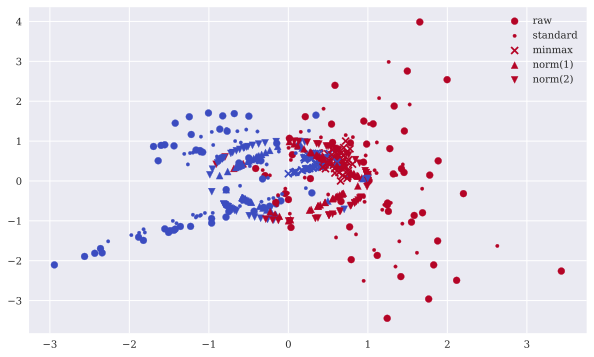

In [73]:
plt.figure(figsize=(10, 6))
markers = ['o', '.', 'x', '^', 'v']
data_sets = [X, Xs, Xm, Xn1, Xn2]
labels = ['raw', 'standard', 'minmax', 'norm(1)', 'norm(2)']
for x, m, l in zip(data_sets, markers, labels):
    plt.scatter(x=x[:, 0], y=x[:, 1], c=y,
            marker=m, cmap='coolwarm', label=l)
plt.legend();
# plt.savefig('../../images/ch13/ml_plot_06.png');

In [74]:
X[:5]

array([[ 1.6876, -0.7976],
       [-0.4312, -0.7606],
       [-1.4393, -1.2363],
       [ 1.118 , -1.8682],
       [ 0.0502,  0.659 ]])

In [75]:
Xb = preprocessing.Binarizer().fit_transform(X)  
Xb[:5]

array([[1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 1.]])

In [76]:
2 ** 2  

4

In [77]:
Xd = np.digitize(X, bins=[-1, 0, 1])  
Xd[:5]

array([[3, 1],
       [1, 1],
       [0, 0],
       [3, 0],
       [2, 2]])

In [78]:
4 ** 2  

16

## Train-Test Splits 

In [79]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [80]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.33,
                                                    random_state=0)

In [81]:
model = SVC(C=1, kernel='linear')

In [82]:
model.fit(train_x, train_y)  

SVC(C=1, kernel='linear')

In [83]:
pred_train = model.predict(train_x)  

In [84]:
accuracy_score(train_y, pred_train)  

0.9402985074626866

In [85]:
pred_test = model.predict(test_x)  

In [86]:
test_y == pred_test  

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True])

In [87]:
accuracy_score(test_y, pred_test)  

0.7878787878787878

In [88]:
test_c = test_x[test_y == pred_test]
test_f = test_x[test_y != pred_test]

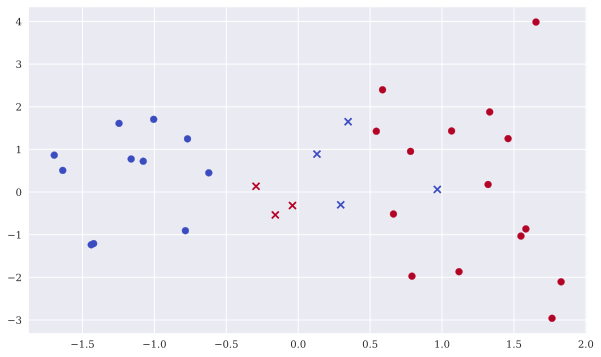

In [89]:
plt.figure(figsize=(10, 6))
plt.scatter(x=test_c[:, 0], y=test_c[:, 1], c=test_y[test_y == pred_test],
            marker='o', cmap='coolwarm')
plt.scatter(x=test_f[:, 0], y=test_f[:, 1], c=test_y[test_y != pred_test],
            marker='x', cmap='coolwarm');
# plt.savefig('../../images/ch13/ml_plot_07.png');

In [90]:
bins = np.linspace(-4.5, 4.5, 50)

In [91]:
Xd = np.digitize(X, bins=bins)

In [92]:
Xd[:5]

array([[34, 21],
       [23, 21],
       [17, 18],
       [31, 15],
       [25, 29]])

In [93]:
train_x, test_x, train_y, test_y = train_test_split(Xd, y, test_size=0.33,
                                                    random_state=0)

In [94]:
print('{:>8s} | {:8s}'.format('kernel', 'accuracy'))
print(20 * '-')
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    model = SVC(C=1, kernel=kernel)
    model.fit(train_x, train_y)
    acc = accuracy_score(test_y, model.predict(test_x))
    print('{:>8s} | {:8.3f}'.format(kernel, acc))

  kernel | accuracy
--------------------
  linear |    0.848
    poly |    0.818
     rbf |    0.788
 sigmoid |    0.455


<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>